Top 10 Handsets:
                    Handset Type  count
0              Huawei B528S-23A  19752
1       Apple iPhone 6S (A1688)   9419
2        Apple iPhone 6 (A1586)   9023
3                     undefined   8987
4        Apple iPhone 7 (A1778)   6326
5       Apple iPhone Se (A1723)   5187
6        Apple iPhone 8 (A1905)   4993
7       Apple iPhone Xr (A2105)   4568
8  Samsung Galaxy S8 (Sm-G950F)   4520
9        Apple iPhone X (A1901)   3813

Top 3 Manufacturers:
   Handset Manufacturer  count
0                Apple  59565
1              Samsung  40839
2               Huawei  34423

Top 5 Handsets per Manufacturer:
                Handset Manufacturer  \
0                            Huawei   
1                             Apple   
2                             Apple   
3                         undefined   
4                             Apple   
...                             ...   
1392                        Samsung   
1393     Dg Homtom Group Co Limited   
1394                    

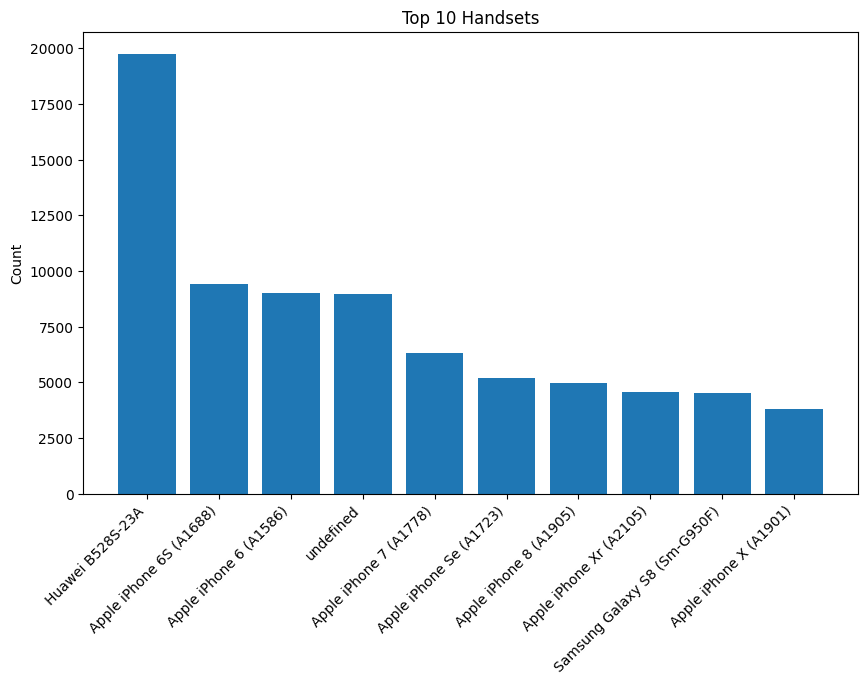

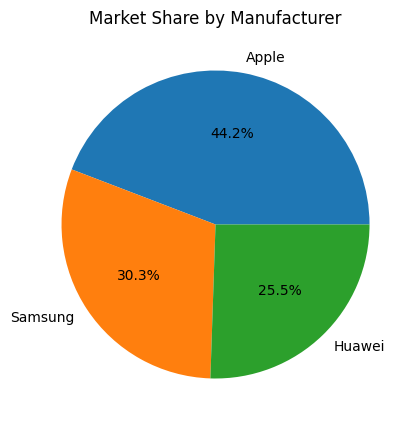

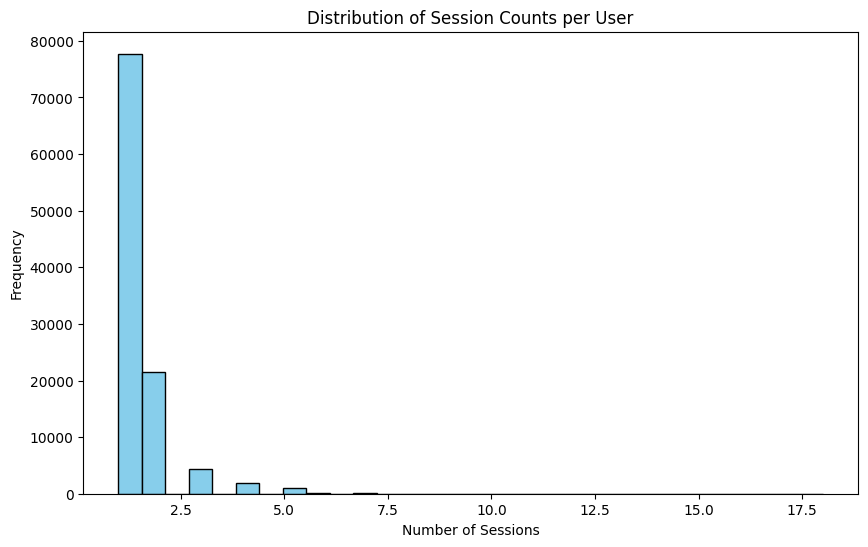

In [ ]:
from db_connection import fetch_data
import pandas as pd
import matplotlib.pyplot as plt

# Queries for handset and manufacturer analysis
QUERY_HANDSET = """
SELECT "Handset Type", COUNT(*) AS count
FROM xdr_data
GROUP BY "Handset Type"
ORDER BY count DESC
LIMIT 10;
"""

QUERY_MANUFACTURER = """
SELECT "Handset Manufacturer", COUNT(*) AS count
FROM xdr_data
GROUP BY "Handset Manufacturer"
ORDER BY count DESC
LIMIT 3;
"""

QUERY_TOP_HANDSETS = """
SELECT "Handset Manufacturer", "Handset Type", COUNT(*) AS count
FROM xdr_data
GROUP BY "Handset Manufacturer", "Handset Type"
ORDER BY count DESC;
"""

# Query for user aggregation
QUERY_AGGREGATE_USERS = """
SELECT "MSISDN/Number",
       COUNT(*) AS session_count,
       SUM("Total UL (Bytes)") AS total_upload,
       SUM("Total DL (Bytes)") AS total_download,
       SUM("Dur. (ms)") AS total_duration
FROM xdr_data
GROUP BY "MSISDN/Number"
ORDER BY session_count DESC;
"""

# Fetch data from DB for handsets
def load_handset_data():
    return fetch_data(QUERY_HANDSET)

# Fetch data from DB for manufacturers
def load_manufacturer_data():
    return fetch_data(QUERY_MANUFACTURER)

# Fetch top handsets per manufacturer
def load_top_handsets_per_manufacturer():
    return fetch_data(QUERY_TOP_HANDSETS)

# Fetch aggregated user data
def load_aggregated_user_data():
    return fetch_data(QUERY_AGGREGATE_USERS)

def clean_aggregated_data(df):
    # Drop rows where 'MSISDN/Number' is NaN
    df_cleaned = df.dropna(subset=["MSISDN/Number"])
    
    # Optionally, reset index
    df_cleaned.reset_index(drop=True, inplace=True)

    # Display summary after cleaning
    print(f"\nData after cleaning (NaN removed): {len(df_cleaned)} rows remaining")
    return df_cleaned

def visualize_data(handset_df, manufacturer_df, user_data):
    # Plot Top 10 Handsets
    plt.figure(figsize=(10, 6))
    plt.bar(handset_df['Handset Type'], handset_df['count'])
    plt.title('Top 10 Handsets')
    plt.xticks(rotation=45, ha='right')
    plt.ylabel('Count')
    plt.show()

    # Plot Top 3 Manufacturers
    plt.figure(figsize=(8, 5))
    plt.pie(manufacturer_df['count'], labels=manufacturer_df['Handset Manufacturer'], autopct='%1.1f%%')
    plt.title('Market Share by Manufacturer')
    plt.show()

    # Plot User Engagement (Session Count Distribution)
    plt.figure(figsize=(10, 6))
    plt.hist(user_data['session_count'], bins=30, color='skyblue', edgecolor='black')
    plt.title('Distribution of Session Counts per User')
    plt.xlabel('Number of Sessions')
    plt.ylabel('Frequency')
    plt.show()



if __name__ == "__main__":
    # Handset Analysis
    print("Top 10 Handsets:\n", load_handset_data())
    print("\nTop 3 Manufacturers:\n", load_manufacturer_data())
    print("\nTop 5 Handsets per Manufacturer:\n", load_top_handsets_per_manufacturer())

    # User Data Aggregation
    user_data = load_aggregated_user_data()
    print("\nAggregated User Data:\n", user_data.head(10))  # Display top 10 results
 
    # Handset Analysis
    top_handsets = load_handset_data()
    top_manufacturers = load_manufacturer_data()
    top_per_manufacturer = load_top_handsets_per_manufacturer()

     # User Data Aggregation
    user_data = load_aggregated_user_data()
    
    # Data Cleaning
    user_data_cleaned = clean_aggregated_data(user_data)
    
    # Visualization
    visualize_data(top_handsets, top_manufacturers, user_data_cleaned)